# Análisis De Datos Y Predicción De Bajas De Clientes
# Por: *Yonatan Eleuterio Rubio*
## 1. Análisis de Calidad de Datos

In [3]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
df = pd.read_csv('Clientes.csv', sep=';', encoding='latin1')

# Vista inicial de los datos
print(df.head())
print(df.info())  # Revisar tipos de datos y si hay valores nulos
print(df.describe())  # Estadísticas descriptivas de las variables numéricas

# Verificar valores faltantes
print(df.isnull().sum())

# Revisar valores únicos de las columnas categóricas
print(df['VuelosFrecuentes'].unique())
print(df['IngresosAnuales'].unique())
print(df['CuentaenSyncconRRSS'].unique())
print(df['Reservadehotel'].unique())


   Edad VuelosFrecuentes  IngresosAnuales  ServiciosUtilizados  \
0    34               No  Ingresos Medios                    6   
1    34               Sí   Ingresos Bajos                    5   
2    37               No  Ingresos Medios                    3   
3    30               No  Ingresos Medios                    2   
4    30               No   Ingresos Bajos                    1   

  CuentaenSyncconRRSS Reservadehotel  Baja  
0                  No             Sí     0  
1                  Sí             No     1  
2                  Sí             No     0  
3                  No             No     0  
4                  No             No     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Edad                 954 non-null    int64 
 1   VuelosFrecuentes     954 non-null    object
 2   IngresosAnuales      954 non

## 2. Preprocesamiento de Datos

In [5]:
# Rellenar valores faltantes en la columna 'VuelosFrecuentes' (por ejemplo, con la moda)
df['VuelosFrecuentes'].replace('Sin registros', df['VuelosFrecuentes'].mode()[0], inplace=True)

# Codificación de variables categóricas
le = LabelEncoder()
df['VuelosFrecuentes'] = le.fit_transform(df['VuelosFrecuentes'])
df['IngresosAnuales'] = le.fit_transform(df['IngresosAnuales'])
df['CuentaenSyncconRRSS'] = le.fit_transform(df['CuentaenSyncconRRSS'])
df['Reservadehotel'] = le.fit_transform(df['Reservadehotel'])

# Revisar el dataset después de la codificación
print(df.describe()) 
df.info()
df.head()

             Edad  VuelosFrecuentes  IngresosAnuales  ServiciosUtilizados  \
count  954.000000        954.000000       954.000000           954.000000   
mean    32.109015          0.299790         1.262055             2.437107   
std      3.337388          0.458406         0.726132             1.606233   
min     27.000000          0.000000         0.000000             1.000000   
25%     30.000000          0.000000         1.000000             1.000000   
50%     31.000000          0.000000         1.000000             2.000000   
75%     35.000000          1.000000         2.000000             4.000000   
max     38.000000          1.000000         2.000000             6.000000   

       CuentaenSyncconRRSS  Reservadehotel        Baja  
count           954.000000      954.000000  954.000000  
mean              0.377358        0.396226    0.234801  
std               0.484980        0.489369    0.424097  
min               0.000000        0.000000    0.000000  
25%               0.0

,Edad,VuelosFrecuentes,IngresosAnuales,ServiciosUtilizados,CuentaenSyncconRRSS,Reservadehotel,Baja
0,34,0,2,6,0,1,0
1,34,1,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


## 3. Visualización de Datos

C:\Users\yonat\AppData\Local\Temp\ipykernel_25424\3639072979.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, baja_counts[i], f'{baja_counts[i]:.1f}%', ha='center', va='bottom')


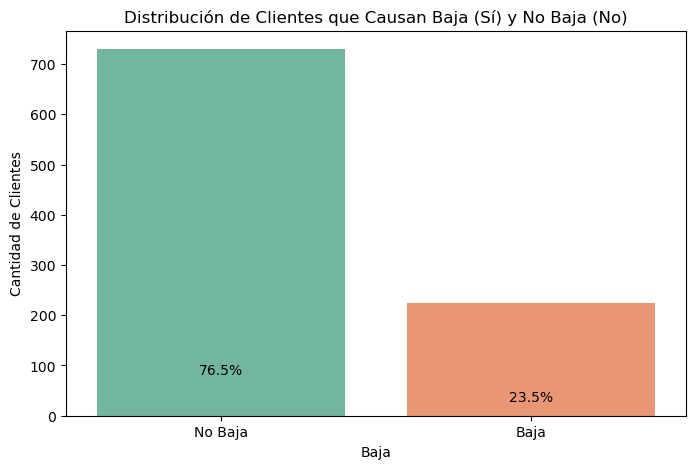

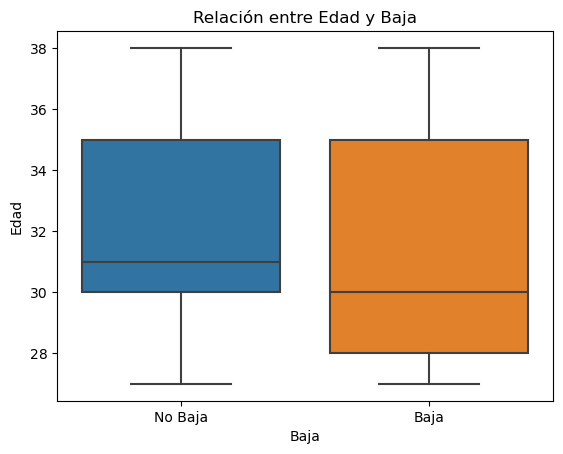

In [7]:
# Calcular la distribución de bajas
baja_counts = df['Baja'].value_counts(normalize=True) * 100  # Porcentajes
baja_counts = baja_counts.rename({0: 'No Baja', 1: 'Baja'})  # Renombrar para mayor claridad

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Baja', data=df, palette='Set2')

# Añadir los porcentajes encima de las barras
for i in range(len(baja_counts)):
    plt.text(i, baja_counts[i], f'{baja_counts[i]:.1f}%', ha='center', va='bottom')

plt.title('Distribución de Clientes que Causan Baja (Sí) y No Baja (No)')
plt.xlabel('Baja')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Baja', 'Baja'])
plt.show()


# Relación entre Edad y Baja
sns.boxplot(x='Baja', y='Edad', data=df)
plt.title('Relación entre Edad y Baja')
plt.xticks(ticks=[0, 1], labels=['No Baja', 'Baja'])
plt.show()



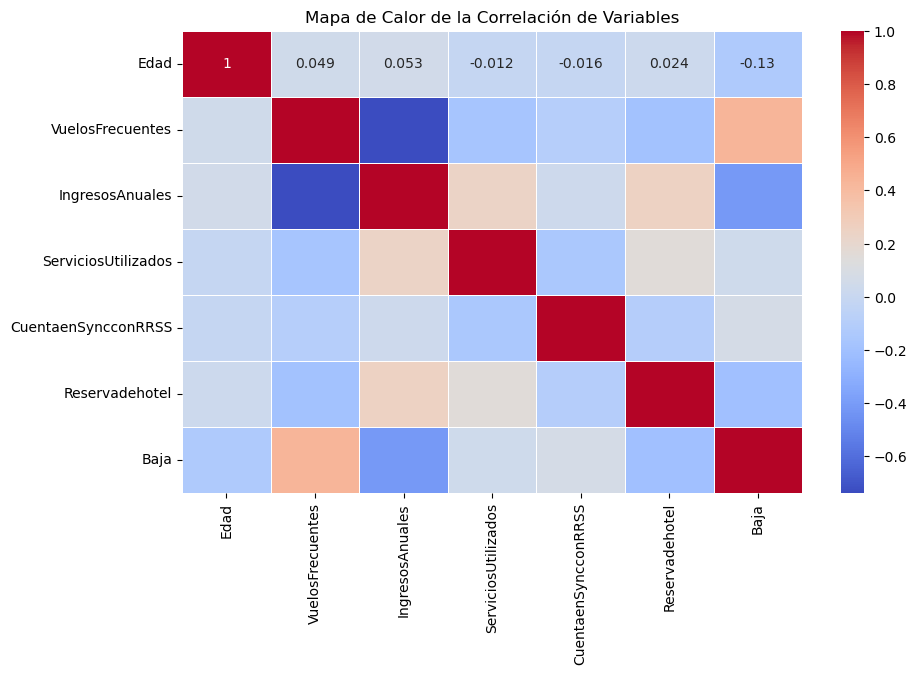

In [8]:

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación de Variables')
plt.show()


## 4. Modelo Predictivo (Árbol de Decisión)

In [10]:
# Definir X y y (variables independientes y dependiente)
X = df.drop(columns=['Baja'])  # Todas las variables excepto 'Baja'
y = df['Baja']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8989547038327527
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       219
           1       0.82      0.74      0.78        68

    accuracy                           0.90       287
   macro avg       0.87      0.84      0.86       287
weighted avg       0.90      0.90      0.90       287



1. *Exactitud (Accuracy)*
El modelo predice correctamente si un cliente causará baja o no en el 89.9% de los casos. Esta métrica global es un buen indicador de que el modelo está funcionando bien en general.
2. *Precision, Recall y F1-Score*
Clase 0 (No Baja):
Precision (92%): El 92% de los clientes que el modelo predijo que no causarían baja, efectivamente no lo hicieron.
Recall (95%): El modelo identificó correctamente el 95% de los clientes que realmente no causaron baja.
F1-Score (93%): Esta métrica combina la precisión y el recall, lo que indica que el modelo está equilibrado al predecir los clientes que no causan baja.
Clase 1 (Baja):
Precision (82%): El 82% de los clientes que el modelo predijo que causarían baja, efectivamente lo hicieron.
Recall (74%): El modelo identificó correctamente el 74% de los clientes que realmente causaron baja. Este valor es más bajo que el de la clase 0, lo que sugiere que el modelo tiene más dificultades para detectar todos los clientes que efectivamente se darán de baja.
F1-Score (78%): Aunque es más bajo que en la clase 0, sigue siendo un buen valor, lo que indica un rendimiento aceptable en la predicción de bajas.
3. *Interpretación de Resultados*
El modelo tiene un excelente rendimiento al predecir los clientes que no causarán baja (clase 0), con altos valores de precisión y recall.
Sin embargo, el recall para la clase 1 (Baja) es más bajo, lo que significa que podría mejorar su capacidad para detectar todos los clientes que causarán baja.

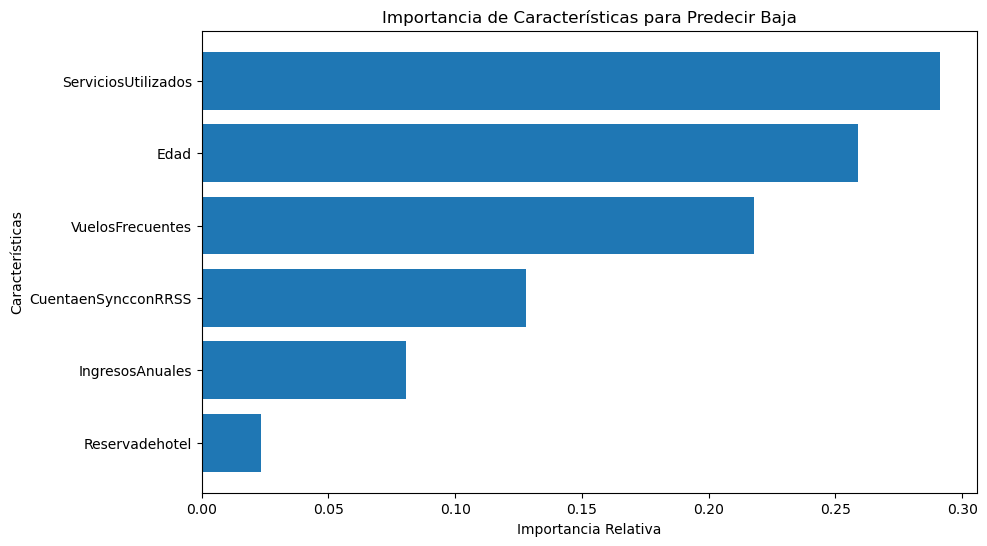

In [12]:
# Importancia de características del modelo
importances = model.feature_importances_
features = X.columns

# Ordenar las características por importancia
indices = np.argsort(importances)

# Gráfico de barras de la importancia de características
plt.figure(figsize=(10, 6))
plt.title('Importancia de Características para Predecir Baja')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.show()


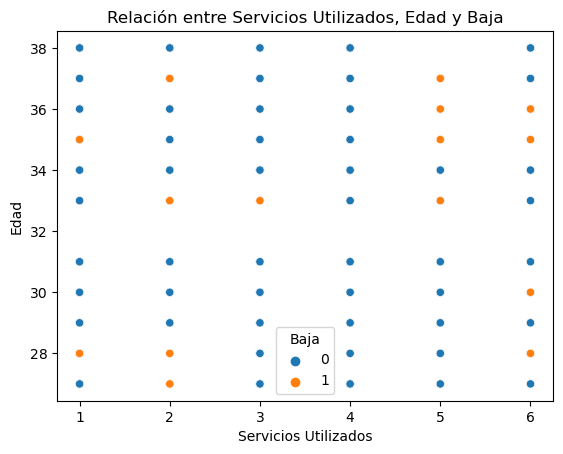

In [13]:
sns.scatterplot(x='ServiciosUtilizados', y='Edad', hue='Baja', data=df)
plt.title('Relación entre Servicios Utilizados, Edad y Baja')
plt.xlabel('Servicios Utilizados')
plt.ylabel('Edad')
plt.legend(title='Baja')
plt.show()


Por los resultados gráficos podemos observar que es más probable que cause baja debido a la cantidad de servicios utilizados y la cantidad de vuelos, aunque la edad no es relevante como lo indica el mapa de calor si tiene una varianza amplia.

Ajuste de Hiperparámetros en el Árbol de Decisión
Podemos usar GridSearchCV para ajustar los hiperparámetros del modelo de decisión, lo que nos permite probar diferentes combinaciones y seleccionar la mejor opción. Algunos hiperparámetros comunes que se ajustan en un árbol de decisión son:

max_depth: La profundidad máxima del árbol.
min_samples_split: El número mínimo de muestras requerido para dividir un nodo.
min_samples_leaf: El número mínimo de muestras que debe tener un nodo hoja.


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros que queremos probar
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Crear un modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)

# Usar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con las diferentes combinaciones
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predecir con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluación del modelo ajustado
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8989547038327527
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       219
           1       0.82      0.74      0.78        68

    accuracy                           0.90       287
   macro avg       0.87      0.84      0.86       287
weighted avg       0.90      0.90      0.90       287



Arroja los mismo resultados por lo que probaremos con otra técnica , dado que el número de clientes que causan baja es menor que el número de los que no causan baja, probaremos técnicas de balanceo como SMOTE o submuestreo para mejorar el recall de la clase 1.

## 2. Balanceo de Clases con SMOTE


SMOTE (Synthetic Minority Over-sampling Technique) es una técnica para generar nuevas muestras sintéticas para la clase minoritaria (clientes que causan baja) y así balancear el dataset. Esto puede ayudar al modelo a aprender mejor las características de la clase minoritaria.

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Aplicar SMOTE para generar más datos de la clase minoritaria (Baja = 1)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir el dataset balanceado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos balanceados
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train, y_train)

# Predicciones
y_pred_smote = model_smote.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print(classification_report(y_test, y_pred_smote))


Accuracy: 0.9223744292237442
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       219
           1       0.91      0.93      0.92       219

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.92       438



## 3. Submuestreo de la Clase Mayoritaria (Undersampling)
Otra técnica para balancear las clases es reducir el número de muestras de la clase mayoritaria (clientes que no causan baja). Esto puede ser útil si prefieres mantener el dataset pequeño en lugar de generar más muestras sintéticas.


In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo a la clase mayoritaria
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Dividir el dataset balanceado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos balanceados
model_undersample = DecisionTreeClassifier(random_state=42)
model_undersample.fit(X_train, y_train)

# Predicciones
y_pred_undersample = model_undersample.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_undersample)}")
print(classification_report(y_test, y_pred_undersample))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.87      0.84      0.86        64

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



Creamos un gráfico que permita al cliente identificar de manera visual los clientes propensos a causar baja, puedes usar un gráfico de tipo "semáforo" (o "traffic light") que utilice colores para representar diferentes niveles de riesgo. 

## 1. Definir Criterios de Riesgo

Primero, necesitamos definir qué significa ser "propenso a causar baja". Puedes establecer un umbral basado en la probabilidad predicha del modelo o en las características de los clientes.

Por ejemplo:

Alto Riesgo: Probabilidad >= 0.75 (rojo)
Riesgo Moderado: 0.50 <= Probabilidad < 0.75 (amarillo)
Bajo Riesgo: Probabilidad < 0.50 (verde)


## 2. Predecir las Probabilidades

In [22]:
# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1 (baja)


## 3. Agregar las Predicciones al DataFrame

In [24]:
# Crear un DataFrame con los resultados
results_df = X_test.copy()
results_df['Probabilidad Baja'] = y_pred_proba
results_df['Baja Predicha'] = (y_pred_proba >= 0.5).astype(int)  # Convertir a 0 o 1

# Establecer el riesgo basado en las probabilidades
def riesgo(prob):
    if prob >= 0.75:
        return 'Alto Riesgo'
    elif prob >= 0.50:
        return 'Riesgo Moderado'
    else:
        return 'Bajo Riesgo'

results_df['Categoría Riesgo'] = results_df['Probabilidad Baja'].apply(riesgo)


## 4. Crear el Gráfico Semáforo

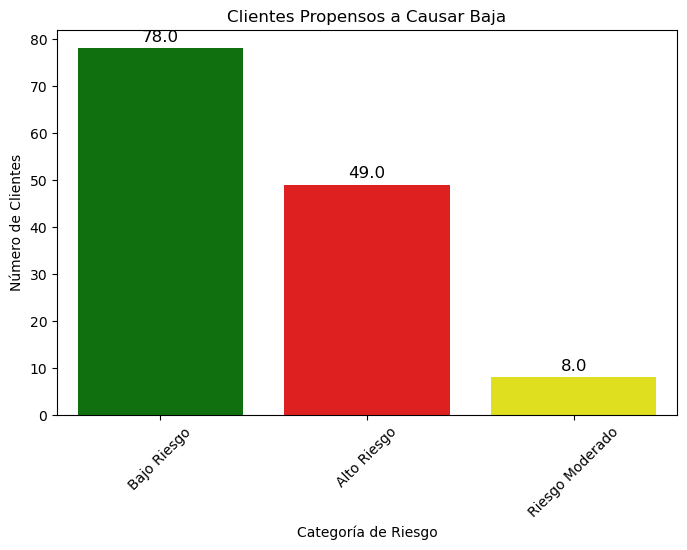

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes en cada categoría de riesgo
risk_counts = results_df['Categoría Riesgo'].value_counts()

# Crear el gráfico con anotaciones
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=['green', 'red', 'yellow'])
plt.title('Clientes Propensos a Causar Baja')
plt.xlabel('Categoría de Riesgo')
plt.ylabel('Número de Clientes')

# Anotar las barras con los valores
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


 # Calculador de Bajas
Creamos una heramienta para usar una función que tome como entrada las características del cliente y utilice el modelo de predicción para devolver la probabilidad de baja y la clasificación resultante.

La probamos con datos para ver su función

In [57]:
def predecir_baja(edad, vuelos_frecuentes, ingresos_anuales, servicios_utilizados, cuenta_en_sync, reserva_hotel):
    # Crear un DataFrame de entrada con las características
    cliente = pd.DataFrame({
        'Edad': [edad],
        'VuelosFrecuentes': [vuelos_frecuentes],
        'IngresosAnuales': [ingresos_anuales],
        'ServiciosUtilizados': [servicios_utilizados],
        'CuentaenSyncconRRSS': [cuenta_en_sync],
        'Reservadehotel': [reserva_hotel]
    })
    
    # Realizar las mismas transformaciones que hiciste al entrenar el modelo (ej. codificación de variables categóricas)
    cliente['VuelosFrecuentes'] = cliente['VuelosFrecuentes'].map({'Sí': 1, 'No': 0})
    cliente['CuentaenSyncconRRSS'] = cliente['CuentaenSyncconRRSS'].map({'Sí': 1, 'No': 0})
    cliente['Reservadehotel'] = cliente['Reservadehotel'].map({'Sí': 1, 'No': 0})
    cliente['IngresosAnuales'] = cliente['IngresosAnuales'].map({'Ingresos Bajos': 1, 'Ingresos Medios': 2, 'Ingresos Altos': 3})

    # Hacer la predicción
    probabilidad_baja = model.predict_proba(cliente)[:, 1][0]  # Probabilidad de clase 1 (baja)
    clasificacion_baja = model.predict(cliente)[0]  # Clasificación

    # Devolver la probabilidad y la clasificación
    return probabilidad_baja, clasificacion_baja

# Ejemplo de uso de la función
probabilidad, clasificacion = predecir_baja(40, 'Sí', 'Ingresos Altos', 1, 'Sí', 'No')
print(f"Probabilidad de baja: {probabilidad:.2f}, Clasificación: {'Baja' if clasificacion == 1 else 'No Baja'}")


Probabilidad de baja: 0.75, Clasificación: Baja


In [67]:
def obtener_datos_cliente():
    edad = int(input("Introduce la edad del cliente: (18-100)"))
    vuelos_frecuentes = input("¿Realiza vuelos frecuentes? (Sí/No): ")
    ingresos_anuales = input("Introduce los ingresos anuales (Ingresos Bajos, Ingresos Medios, Ingresos Altos): ")
    servicios_utilizados = int(input("Introduce el número de servicios utilizados (0-10): "))
    cuenta_en_sync = input("¿Está en sync con RRSS? (Sí/No): ")
    reserva_hotel = input("¿Reserva hotel habitualmente? (Sí/No): ")

    return edad, vuelos_frecuentes, ingresos_anuales, servicios_utilizados, cuenta_en_sync, reserva_hotel

# Obtener datos del cliente
datos_cliente = obtener_datos_cliente()

# Realizar la predicción con los datos del cliente
probabilidad, clasificacion = predecir_baja(*datos_cliente)
print(f"Probabilidad de baja: {probabilidad:.2f}, Clasificación: {'Baja' if clasificacion == 1 else 'No Baja'}")


Introduce la edad del cliente:  25
¿Realiza vuelos frecuentes? (Sí/No):  Sí
Introduce los ingresos anuales (Ingresos Bajos, Ingresos Medios, Ingresos Altos):  Ingresos Medios
Introduce el número de servicios utilizados:  4
¿Está en sync con RRSS? (Sí/No):  Sí
¿Reserva hotel habitualmente? (Sí/No):  No


Probabilidad de baja: 1.00, Clasificación: Baja
